In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# prompt: machine learning libraries
!pip install scikit-learn tensorflow keras

import sklearn
import tensorflow as tf
from tensorflow import keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00


In [4]:
from sklearn.preprocessing import LabelEncoder

In [6]:
data = pd.read_csv('/content/drive/MyDrive/flightprice/itineraries.csv')

In [7]:
data.head()

legId  searchDate  flightDate startingAirport  \
0  9ca0e81111c683bec1012473feefd28f  2022-04-16  2022-04-17             ATL   
1  98685953630e772a098941b71906592b  2022-04-16  2022-04-17             ATL   
2  98d90cbc32bfbb05c2fc32897c7c1087  2022-04-16  2022-04-17             ATL   
3  969a269d38eae583f455486fa90877b4  2022-04-16  2022-04-17             ATL   
4  980370cf27c89b40d2833a1d5afc9751  2022-04-16  2022-04-17             ATL   

  destinationAirport fareBasisCode travelDuration  elapsedDays  \
0                BOS      LA0NX0MC        PT2H29M            0   
1                BOS      LA0NX0MC        PT2H30M            0   
2                BOS      LA0NX0MC        PT2H30M            0   
3                BOS      LA0NX0MC        PT2H32M            0   
4                BOS      LA0NX0MC        PT2H34M            0   

   isBasicEconomy  isRefundable  ...  segmentsArrivalTimeEpochSeconds  \
0           False         False  ...                       1650223560   
1           False         False  ...                       1650200400   
2           False         False  ...                       1650218700   
3           False         False  ...                       1650227460   
4           False         False  ...                       1650213180   

          segmentsArrivalTimeRaw  segmentsArrivalAirportCode  \
0  2022-04-17T15:26:00.000-04:00                         BOS   
1  2022-04-17T09:00:00.000-04:00                         BOS   
2  2022-04-17T14:05:00.000-04:00                         BOS   
3  2022-04-17T16:31:00.000-04:00                         BOS   
4  2022-04-17T12:33:00.000-04:00                         BOS   

   segmentsDepartureAirportCode  segmentsAirlineName segmentsAirlineCode  \
0                           ATL                Delta                  DL   
1                           ATL                Delta                  DL   
2                           ATL                Delta                  DL   
3                           ATL                Delta                  DL   
4                           ATL                Delta                  DL   

  segmentsEquipmentDescription segmentsDurationInSeconds segmentsDistance  \
0                  Airbus A321                      8940              947   
1                  Airbus A321                      9000              947   
2               Boeing 757-200                      9000              947   
3                  Airbus A321                      9120              947   
4                  Airbus A321                      9240              947   

  segmentsCabinCode  
0             coach  
1             coach  
2             coach  
3             coach  
4             coach  

[5 rows x 27 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82138753 entries, 0 to 82138752
Data columns (total 27 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   legId                              object 
 1   searchDate                         object 
 2   flightDate                         object 
 3   startingAirport                    object 
 4   destinationAirport                 object 
 5   fareBasisCode                      object 
 6   travelDuration                     object 
 7   elapsedDays                        int64  
 8   isBasicEconomy                     bool   
 9   isRefundable                       bool   
 10  isNonStop                          bool   
 11  baseFare                           float64
 12  totalFare                          float64
 13  seatsRemaining                     int64  
 14  totalTravelDistance                float64
 15  segmentsDepartureTimeEpochSeconds  object 
 16  segmentsDepartur

In [8]:
data.describe()

elapsedDays      baseFare     totalFare  seatsRemaining  \
count  8.213875e+07  8.213875e+07  8.213875e+07    8.213875e+07   
mean   1.496531e-01  2.926629e+02  3.403868e+02    5.976312e+00   
std    3.567567e-01  1.831888e+02  1.960295e+02    2.880567e+00   
min    0.000000e+00  1.000000e-02  1.959000e+01    0.000000e+00   
25%    0.000000e+00  1.590000e+02  1.971000e+02    4.000000e+00   
50%    0.000000e+00  2.604700e+02  3.052000e+02    7.000000e+00   
75%    0.000000e+00  3.981400e+02  4.520900e+02    9.000000e+00   
max    2.000000e+00  7.662330e+03  8.260610e+03    1.000000e+01   

       totalTravelDistance  
count         7.604422e+07  
mean          1.609903e+03  
std           8.573257e+02  
min           8.900000e+01  
25%           8.780000e+02  
50%           1.468000e+03  
75%           2.415000e+03  
max           7.252000e+03

In [11]:
data.shape

(82138753, 27)

In [12]:
data['searchDate'] = pd.to_datetime(data['searchDate'], errors='coerce')
data['flightDate'] = pd.to_datetime(data['flightDate'], errors='coerce')

In [14]:
data.isnull().sum()

legId                                      0
searchDate                                 0
flightDate                                 0
startingAirport                            0
destinationAirport                         0
fareBasisCode                              0
travelDuration                             0
elapsedDays                                0
isBasicEconomy                             0
isRefundable                               0
isNonStop                                  0
baseFare                                   0
totalFare                                  0
seatsRemaining                             0
totalTravelDistance                  6094532
segmentsDepartureTimeEpochSeconds          0
segmentsDepartureTimeRaw                   0
segmentsArrivalTimeEpochSeconds            0
segmentsArrivalTimeRaw                     0
segmentsArrivalAirportCode                 0
segmentsDepartureAirportCode               0
segmentsAirlineName                        0
segmentsAirlineCode                        0
segmentsEquipmentDescription         1557592
segmentsDurationInSeconds                  0
segmentsDistance                      853219
segmentsCabinCode                          0
dtype: int64

In [8]:
# For totalTravelDistance, fill missing values with the median
total_travel_median = data['totalTravelDistance'].median()
data['totalTravelDistance'] = data['totalTravelDistance'].fillna(total_travel_median)

In [9]:
# For segmentsDistance, first convert to numeric (if needed), then fill missing with the median
data['segmentsDistance'] = pd.to_numeric(data['segmentsDistance'], errors='coerce')
segments_distance_median = data['segmentsDistance'].median()
data['segmentsDistance'] = data['segmentsDistance'].fillna(segments_distance_median)

In [10]:
# For segmentsEquipmentDescription, fill missing values with a placeholder "Unknown"
data['segmentsEquipmentDescription'] = data['segmentsEquipmentDescription'].fillna("Unknown")

In [11]:
data.isnull().sum()

legId                                0
searchDate                           0
flightDate                           0
startingAirport                      0
destinationAirport                   0
fareBasisCode                        0
travelDuration                       0
elapsedDays                          0
isBasicEconomy                       0
isRefundable                         0
isNonStop                            0
baseFare                             0
totalFare                            0
seatsRemaining                       0
totalTravelDistance                  0
segmentsDepartureTimeEpochSeconds    0
segmentsDepartureTimeRaw             0
segmentsArrivalTimeEpochSeconds      0
segmentsArrivalTimeRaw               0
segmentsArrivalAirportCode           0
segmentsDepartureAirportCode         0
segmentsAirlineName                  0
segmentsAirlineCode                  0
segmentsEquipmentDescription         0
segmentsDurationInSeconds            0
segmentsDistance                     0
segmentsCabinCode                    0
dtype: int64

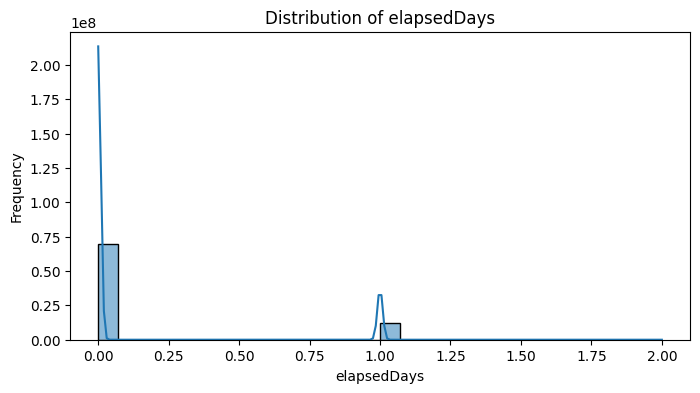

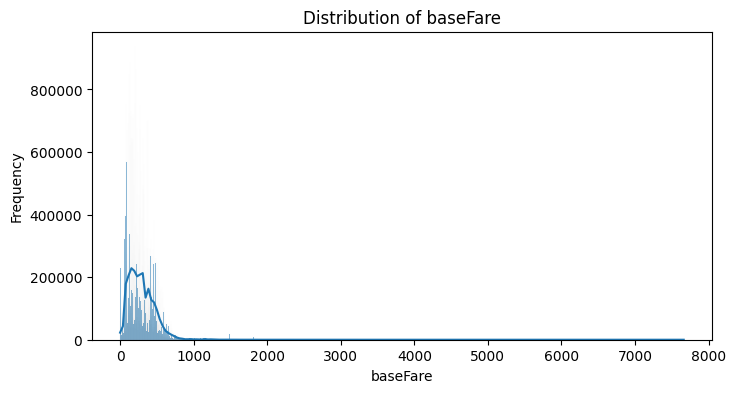

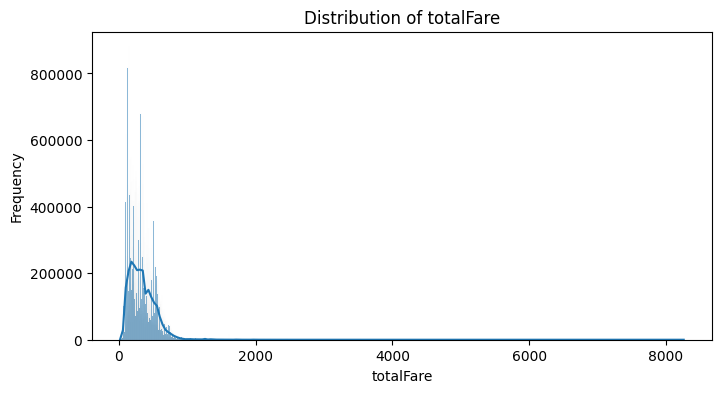

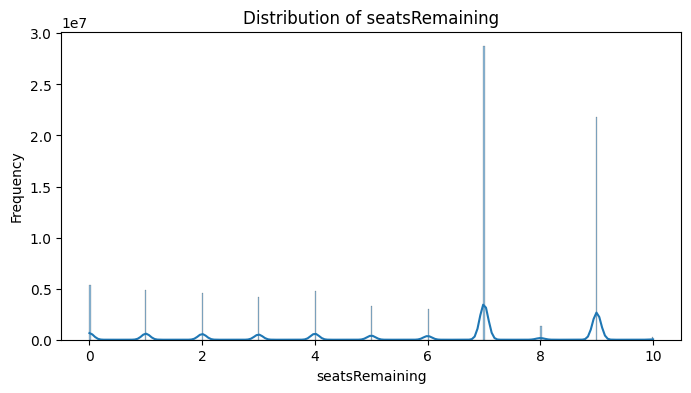

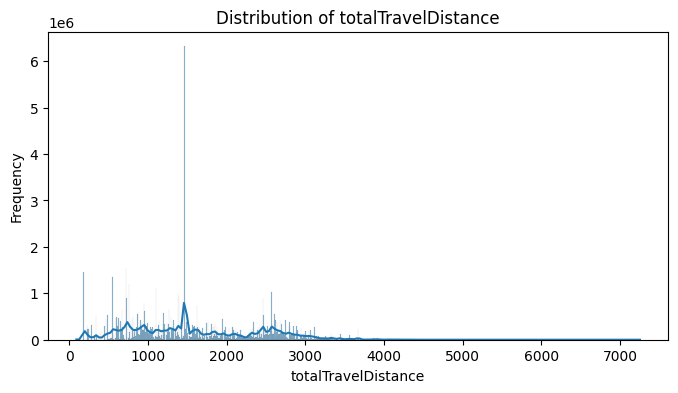

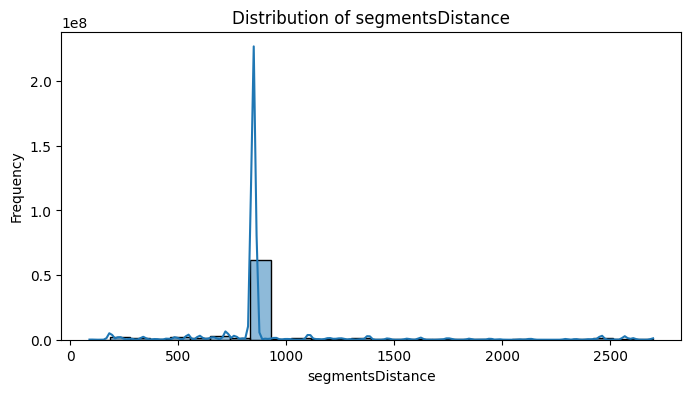

In [23]:
# Get list of numerical columns
num_cols = data.select_dtypes(include=["int64", "float64"]).columns

# Plot histograms for each numerical column
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [12]:
data.nunique()

legId                                5999739
searchDate                               171
flightDate                               217
startingAirport                           16
destinationAirport                        16
fareBasisCode                          21062
travelDuration                          2110
elapsedDays                                3
isBasicEconomy                             2
isRefundable                               2
isNonStop                                  2
baseFare                               35866
totalFare                              59104
seatsRemaining                            11
totalTravelDistance                     3245
segmentsDepartureTimeEpochSeconds    4467904
segmentsDepartureTimeRaw             4829838
segmentsArrivalTimeEpochSeconds      5139874
segmentsArrivalTimeRaw               5342522
segmentsArrivalAirportCode             10318
segmentsDepartureAirportCode           10104
segmentsAirlineName                      146
segmentsAirlineCode                      146
segmentsEquipmentDescription           11456
segmentsDurationInSeconds             295775
segmentsDistance                         114
segmentsCabinCode                         71
dtype: int64

In [13]:
data.head()

legId  searchDate  flightDate startingAirport  \
0  9ca0e81111c683bec1012473feefd28f  2022-04-16  2022-04-17             ATL   
1  98685953630e772a098941b71906592b  2022-04-16  2022-04-17             ATL   
2  98d90cbc32bfbb05c2fc32897c7c1087  2022-04-16  2022-04-17             ATL   
3  969a269d38eae583f455486fa90877b4  2022-04-16  2022-04-17             ATL   
4  980370cf27c89b40d2833a1d5afc9751  2022-04-16  2022-04-17             ATL   

  destinationAirport fareBasisCode travelDuration  elapsedDays  \
0                BOS      LA0NX0MC        PT2H29M            0   
1                BOS      LA0NX0MC        PT2H30M            0   
2                BOS      LA0NX0MC        PT2H30M            0   
3                BOS      LA0NX0MC        PT2H32M            0   
4                BOS      LA0NX0MC        PT2H34M            0   

   isBasicEconomy  isRefundable  ...  segmentsArrivalTimeEpochSeconds  \
0           False         False  ...                       1650223560   
1           False         False  ...                       1650200400   
2           False         False  ...                       1650218700   
3           False         False  ...                       1650227460   
4           False         False  ...                       1650213180   

          segmentsArrivalTimeRaw  segmentsArrivalAirportCode  \
0  2022-04-17T15:26:00.000-04:00                         BOS   
1  2022-04-17T09:00:00.000-04:00                         BOS   
2  2022-04-17T14:05:00.000-04:00                         BOS   
3  2022-04-17T16:31:00.000-04:00                         BOS   
4  2022-04-17T12:33:00.000-04:00                         BOS   

   segmentsDepartureAirportCode  segmentsAirlineName segmentsAirlineCode  \
0                           ATL                Delta                  DL   
1                           ATL                Delta                  DL   
2                           ATL                Delta                  DL   
3                           ATL                Delta                  DL   
4                           ATL                Delta                  DL   

  segmentsEquipmentDescription segmentsDurationInSeconds segmentsDistance  \
0                  Airbus A321                      8940            947.0   
1                  Airbus A321                      9000            947.0   
2               Boeing 757-200                      9000            947.0   
3                  Airbus A321                      9120            947.0   
4                  Airbus A321                      9240            947.0   

  segmentsCabinCode  
0             coach  
1             coach  
2             coach  
3             coach  
4             coach  

[5 rows x 27 columns]

In [20]:

def process_segment_duration(x):
    """
    Splits the string by '||', converts each segment to float,
    and returns the sum of the durations.
    """
    if pd.isnull(x):
        return 0.0
    segments = x.split('||')
    durations = []
    for seg in segments:
        try:
            # Convert each segment value to float
            durations.append(float(seg))
        except ValueError:
            # If conversion fails, skip that segment
            continue
    return np.sum(durations) if durations else 0.0

In [21]:
# Create a new column with the float values (sum of durations)
data['total_segments_duration'] = data['segmentsDurationInSeconds'].apply(process_segment_duration)

# Optionally, inspect the new column
print(data[['segmentsDurationInSeconds', 'total_segments_duration']].head())

  segmentsDurationInSeconds  total_segments_duration
0                      8940                   8940.0
1                      9000                   9000.0
2                      9000                   9000.0
3                      9120                   9120.0
4                      9240                   9240.0


In [22]:
data['total_segments_duration'].nunique()

729

In [24]:
data = data.drop('segmentsDurationInSeconds', axis=1)

In [17]:
data['fareBasisCode'].nunique()

21062

In [25]:
import re

def convert_duration_to_seconds(duration):
    """
    Convert an ISO 8601 duration string (e.g., 'PT2H29M' or 'P1DT10H19M')
    into a total number of seconds.
    """
    # Regular expression pattern to capture days, hours, minutes, and seconds.
    pattern = r'P(?:(?P<days>\d+)D)?T(?:(?P<hours>\d+)H)?(?:(?P<minutes>\d+)M)?(?:(?P<seconds>\d+)S)?'
    match = re.match(pattern, duration)
    if match:
        days = int(match.group('days')) if match.group('days') else 0
        hours = int(match.group('hours')) if match.group('hours') else 0
        minutes = int(match.group('minutes')) if match.group('minutes') else 0
        seconds = int(match.group('seconds')) if match.group('seconds') else 0
        total_seconds = days * 86400 + hours * 3600 + minutes * 60 + seconds
        return total_seconds
    else:
        return np.nan

In [26]:

# Apply the function to the travelDuration column and create a new column.
data['travel_duration_seconds'] = data['travelDuration'].apply(convert_duration_to_seconds)

# Optionally, if you prefer minutes, you can create another column:
data['travel_duration_minutes'] = data['travel_duration_seconds'] / 60

# Inspect the new columns.
print(data[['travelDuration', 'travel_duration_seconds', 'travel_duration_minutes']].head())

  travelDuration  travel_duration_seconds  travel_duration_minutes
0        PT2H29M                   8940.0                    149.0
1        PT2H30M                   9000.0                    150.0
2        PT2H30M                   9000.0                    150.0
3        PT2H32M                   9120.0                    152.0
4        PT2H34M                   9240.0                    154.0


In [29]:
# When you're satisfied with the new features, you can drop the original column:
data = data.drop('travelDuration', axis=1)
data = data.drop('travel_duration_seconds', axis=1)

In [30]:
# Optionally, if you prefer minutes, you can create another column:
data['total_segments_duration'] = data['total_segments_duration'] / 60

In [31]:
data.nunique()

legId                                5999739
searchDate                               171
flightDate                               217
startingAirport                           16
destinationAirport                        16
fareBasisCode                          21062
elapsedDays                                3
isBasicEconomy                             2
isRefundable                               2
isNonStop                                  2
baseFare                               35866
totalFare                              59104
seatsRemaining                            11
totalTravelDistance                     3245
segmentsDepartureTimeEpochSeconds    4467904
segmentsDepartureTimeRaw             4829838
segmentsArrivalTimeEpochSeconds      5139874
segmentsArrivalTimeRaw               5342522
segmentsArrivalAirportCode             10318
segmentsDepartureAirportCode           10104
segmentsAirlineName                      146
segmentsAirlineCode                      146
segmentsEquipmentDescription           11456
segmentsDistance                         114
segmentsCabinCode                         71
total_segments_duration                  729
travel_duration_minutes                 2107
dtype: int64

In [33]:
data = data.drop('legId', axis=1)

<ipython-input-34-87b348811f75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='startingAirport', palette='viridis')


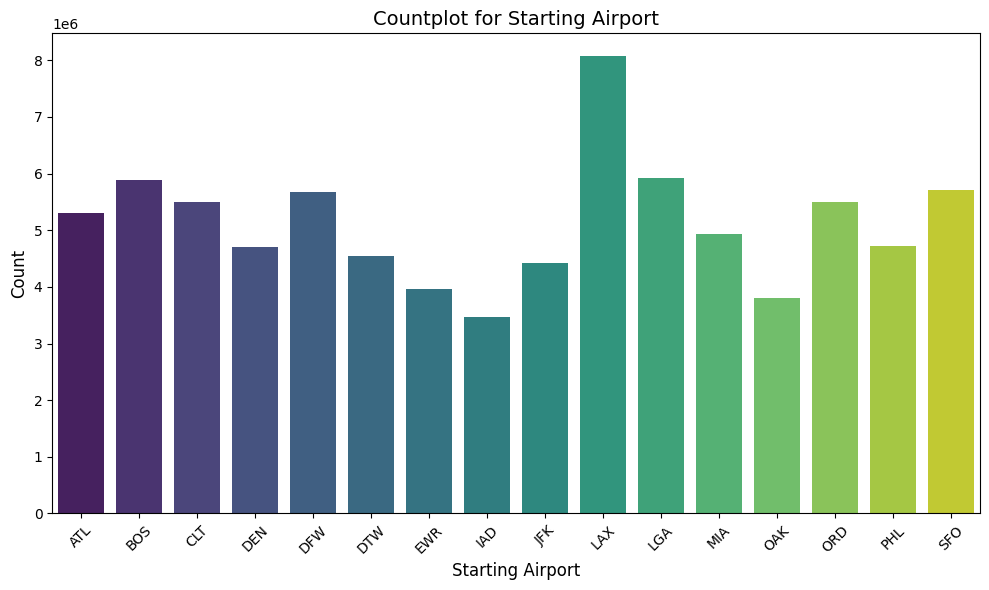

In [34]:
# Starting Airport Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='startingAirport', palette='viridis')
plt.title('Countplot for Starting Airport', fontsize=14)
plt.xlabel('Starting Airport', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-35-ca882aa0a438>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='destinationAirport', palette='Set2')


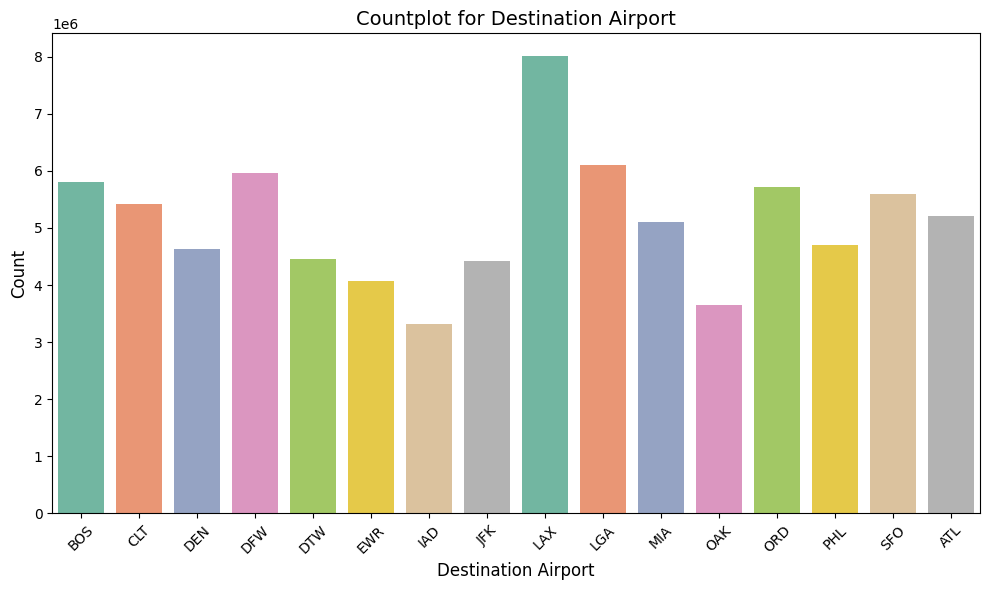

In [35]:
# Destination Airport Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='destinationAirport', palette='Set2')
plt.title('Countplot for Destination Airport', fontsize=14)
plt.xlabel('Destination Airport', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-36-9be37b3b0270>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='elapsedDays', palette='coolwarm')


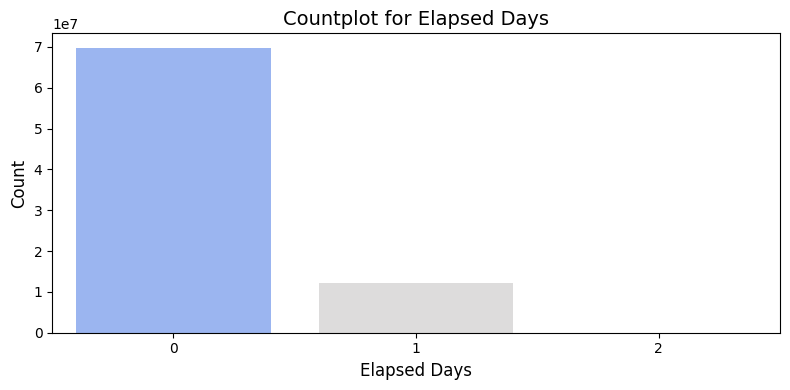

In [36]:
# elapsedDays: Assuming this is a discrete numeric variable.
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='elapsedDays', palette='coolwarm')
plt.title('Countplot for Elapsed Days', fontsize=14)
plt.xlabel('Elapsed Days', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-37-a2d4852e89d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='isBasicEconomy', palette='Set1')


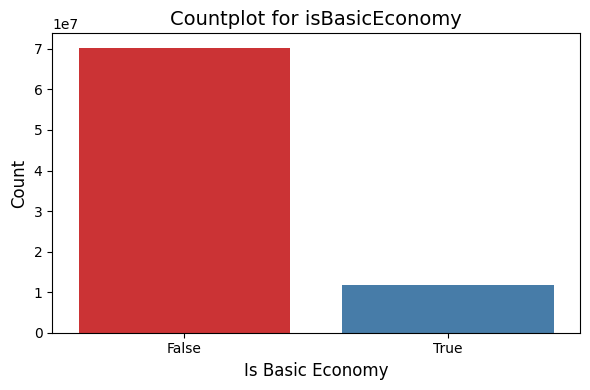

In [37]:
# isBasicEconomy: Boolean values, converted to 0/1.
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='isBasicEconomy', palette='Set1')
plt.title('Countplot for isBasicEconomy', fontsize=14)
plt.xlabel('Is Basic Economy', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-38-e23e1de9de9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='isRefundable', palette='Set3')


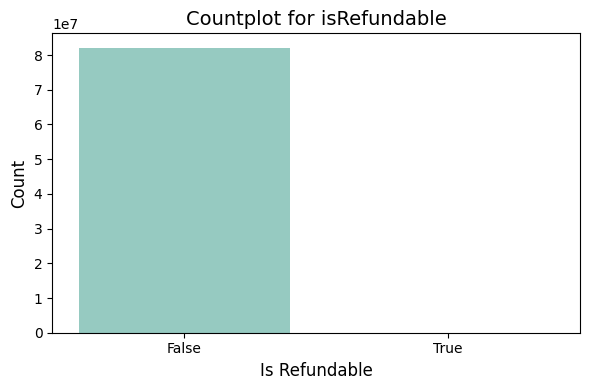

In [38]:
# isRefundable: Boolean values.
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='isRefundable', palette='Set3')
plt.title('Countplot for isRefundable', fontsize=14)
plt.xlabel('Is Refundable', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-39-c3e9d28c7cbd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='isNonStop', palette='Pastel1')


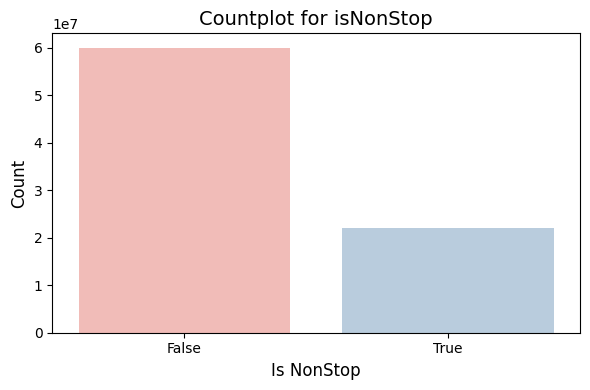

In [39]:
# isNonStop: Boolean values.
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='isNonStop', palette='Pastel1')
plt.title('Countplot for isNonStop', fontsize=14)
plt.xlabel('Is NonStop', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [48]:
data_starting_airport = data['startingAirport'].value_counts()
data_starting_airport.to_csv('/content/drive/MyDrive/flightprice/data_starting_airport.csv', index=False)


In [46]:
data_destination_airport = data['destinationAirport'].value_counts()
data_destination_airport.to_csv('/content/drive/MyDrive/flightprice/data_destination_airport.csv', index=False)

In [47]:
data_elapsed_days = data['elapsedDays'].value_counts()
data_elapsed_days.to_csv('/content/drive/MyDrive/flightprice/data_elapsed_days.csv', index=False)

In [49]:
data_is_basic_economy = data['isBasicEconomy'].value_counts()
data_is_basic_economy.to_csv('/content/drive/MyDrive/flightprice/data_is_basic_economy.csv', index=False)

In [50]:
data_is_refundable = data['isRefundable'].value_counts()
data_is_refundable.to_csv('/content/drive/MyDrive/flightprice/data_is_refundable.csv', index=False)

In [51]:
data_is_non_stop = data['isNonStop'].value_counts()
data_is_non_stop.to_csv('/content/drive/MyDrive/flightprice/data_is_non_stop.csv', index=False)

In [55]:
data.nunique()

searchDate                               171
flightDate                               217
startingAirport                           16
destinationAirport                        16
fareBasisCode                          21062
elapsedDays                                3
isBasicEconomy                             2
isRefundable                               2
isNonStop                                  2
baseFare                               35866
totalFare                              59104
seatsRemaining                            11
totalTravelDistance                     3245
segmentsDepartureTimeEpochSeconds    4467904
segmentsDepartureTimeRaw             4829838
segmentsArrivalTimeEpochSeconds      5139874
segmentsArrivalTimeRaw               5342522
segmentsArrivalAirportCode             10318
segmentsDepartureAirportCode           10104
segmentsAirlineName                      146
segmentsAirlineCode                      146
segmentsEquipmentDescription           11456
segmentsDistance                         114
segmentsCabinCode                         71
total_segments_duration                  729
travel_duration_minutes                 2107
dtype: int64

In [5]:
data = pd.read_csv('/content/drive/MyDrive/flightprice/data_cleaning_phase1.csv')

In [6]:
data.head()

baseFare  totalFare  seatsRemaining  totalTravelDistance  \
0    217.67      248.6               9                947.0   
1    217.67      248.6               4                947.0   
2    217.67      248.6               9                947.0   
3    217.67      248.6               8                947.0   
4    217.67      248.6               9                947.0   

  segmentsDepartureTimeEpochSeconds       segmentsDepartureTimeRaw  \
0                        1650214620  2022-04-17T12:57:00.000-04:00   
1                        1650191400  2022-04-17T06:30:00.000-04:00   
2                        1650209700  2022-04-17T11:35:00.000-04:00   
3                        1650218340  2022-04-17T13:59:00.000-04:00   
4                        1650203940  2022-04-17T09:59:00.000-04:00   

  segmentsArrivalTimeEpochSeconds         segmentsArrivalTimeRaw  \
0                      1650223560  2022-04-17T15:26:00.000-04:00   
1                      1650200400  2022-04-17T09:00:00.000-04:00   
2                      1650218700  2022-04-17T14:05:00.000-04:00   
3                      1650227460  2022-04-17T16:31:00.000-04:00   
4                      1650213180  2022-04-17T12:33:00.000-04:00   

  segmentsArrivalAirportCode segmentsDepartureAirportCode  ...  \
0                        BOS                          ATL  ...   
1                        BOS                          ATL  ...   
2                        BOS                          ATL  ...   
3                        BOS                          ATL  ...   
4                        BOS                          ATL  ...   

  destinationAirport_ORD destinationAirport_PHL destinationAirport_SFO  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   elapsedDays_0 elapsedDays_1  elapsedDays_2  isBasicEconomy  isRefundable  \
0           True         False          False           False         False   
1           True         False          False           False         False   
2           True         False          False           False         False   
3           True         False          False           False         False   
4           True         False          False           False         False   

   isNonStop  fareBasisCode_encoded  
0       True                   4933  
1       True                   4933  
2       True                   4933  
3       True                   4933  
4       True                   4933  

[5 rows x 67 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82138753 entries, 0 to 82138752
Data columns (total 67 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   baseFare                           float64
 1   totalFare                          float64
 2   seatsRemaining                     int64  
 3   totalTravelDistance                float64
 4   segmentsDepartureTimeEpochSeconds  object 
 5   segmentsDepartureTimeRaw           object 
 6   segmentsArrivalTimeEpochSeconds    object 
 7   segmentsArrivalTimeRaw             object 
 8   segmentsArrivalAirportCode         object 
 9   segmentsDepartureAirportCode       object 
 10  segmentsAirlineName                object 
 11  segmentsAirlineCode                object 
 12  segmentsEquipmentDescription       object 
 13  segmentsDistance                   float64
 14  segmentsCabinCode                  object 
 15  total_segments_duration            float64
 16  travel_duration_

In [56]:
data.head()

searchDate  flightDate startingAirport destinationAirport fareBasisCode  \
0  2022-04-16  2022-04-17             ATL                BOS      LA0NX0MC   
1  2022-04-16  2022-04-17             ATL                BOS      LA0NX0MC   
2  2022-04-16  2022-04-17             ATL                BOS      LA0NX0MC   
3  2022-04-16  2022-04-17             ATL                BOS      LA0NX0MC   
4  2022-04-16  2022-04-17             ATL                BOS      LA0NX0MC   

   elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare  ...  \
0            0           False         False       True    217.67  ...   
1            0           False         False       True    217.67  ...   
2            0           False         False       True    217.67  ...   
3            0           False         False       True    217.67  ...   
4            0           False         False       True    217.67  ...   

          segmentsArrivalTimeRaw  segmentsArrivalAirportCode  \
0  2022-04-17T15:26:00.000-04:00                         BOS   
1  2022-04-17T09:00:00.000-04:00                         BOS   
2  2022-04-17T14:05:00.000-04:00                         BOS   
3  2022-04-17T16:31:00.000-04:00                         BOS   
4  2022-04-17T12:33:00.000-04:00                         BOS   

   segmentsDepartureAirportCode segmentsAirlineName segmentsAirlineCode  \
0                           ATL               Delta                  DL   
1                           ATL               Delta                  DL   
2                           ATL               Delta                  DL   
3                           ATL               Delta                  DL   
4                           ATL               Delta                  DL   

  segmentsEquipmentDescription segmentsDistance segmentsCabinCode  \
0                  Airbus A321            947.0             coach   
1                  Airbus A321            947.0             coach   
2               Boeing 757-200            947.0             coach   
3                  Airbus A321            947.0             coach   
4                  Airbus A321            947.0             coach   

  total_segments_duration travel_duration_minutes  
0                   149.0                   149.0  
1                   150.0                   150.0  
2                   150.0                   150.0  
3                   152.0                   152.0  
4                   154.0                   154.0  

[5 rows x 26 columns]

In [61]:
# Convert the date columns to datetime if not already done
data['searchDate'] = pd.to_datetime(data['searchDate'], errors='coerce')
data['flightDate'] = pd.to_datetime(data['flightDate'], errors='coerce')

# Extract features from the search date
data['search_day_of_week'] = data['searchDate'].dt.dayofweek  # Monday=0, Sunday=6
data['search_month'] = data['searchDate'].dt.month
data['search_day'] = data['searchDate'].dt.day

# Extract features from the flight date
data['flight_day_of_week'] = data['flightDate'].dt.dayofweek
data['flight_month'] = data['flightDate'].dt.month
data['flight_day'] = data['flightDate'].dt.day

# Create a cyclic representation for day of week (if needed)
data['search_day_sin'] = np.sin(2 * np.pi * data['search_day_of_week'] / 7)
data['search_day_cos'] = np.cos(2 * np.pi * data['search_day_of_week'] / 7)

data['flight_day_sin'] = np.sin(2 * np.pi * data['flight_day_of_week'] / 7)
data['flight_day_cos'] = np.cos(2 * np.pi * data['flight_day_of_week'] / 7)# Now compute the difference in days and store it as an integer in the new column 'search_difference'

data['search_difference'] = (data['flightDate'] - data['searchDate']).dt.days.astype(int)

In [62]:
data.head()

searchDate flightDate startingAirport destinationAirport fareBasisCode  \
0 2022-04-16 2022-04-17             ATL                BOS      LA0NX0MC   
1 2022-04-16 2022-04-17             ATL                BOS      LA0NX0MC   
2 2022-04-16 2022-04-17             ATL                BOS      LA0NX0MC   
3 2022-04-16 2022-04-17             ATL                BOS      LA0NX0MC   
4 2022-04-16 2022-04-17             ATL                BOS      LA0NX0MC   

   elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare  ...  \
0            0           False         False       True    217.67  ...   
1            0           False         False       True    217.67  ...   
2            0           False         False       True    217.67  ...   
3            0           False         False       True    217.67  ...   
4            0           False         False       True    217.67  ...   

   search_day_of_week  search_month  search_day flight_day_of_week  \
0                   5             4          16                  6   
1                   5             4          16                  6   
2                   5             4          16                  6   
3                   5             4          16                  6   
4                   5             4          16                  6   

  flight_month flight_day search_day_sin search_day_cos flight_day_sin  \
0            4         17      -0.974928      -0.222521      -0.781831   
1            4         17      -0.974928      -0.222521      -0.781831   
2            4         17      -0.974928      -0.222521      -0.781831   
3            4         17      -0.974928      -0.222521      -0.781831   
4            4         17      -0.974928      -0.222521      -0.781831   

  flight_day_cos  
0        0.62349  
1        0.62349  
2        0.62349  
3        0.62349  
4        0.62349  

[5 rows x 37 columns]

In [63]:
data_segments_Arrival_AirportCode = data['segmentsArrivalAirportCode'].value_counts()
data_segments_Arrival_AirportCode.to_csv('/content/drive/MyDrive/flightprice/data_segments_Arrival_AirportCode.csv', index=False)

In [64]:
data_segments_Departure_AirportCode = data['segmentsDepartureAirportCode'].value_counts()
data_segments_Departure_AirportCode.to_csv('/content/drive/MyDrive/flightprice/data_segments_Departure_AirportCode.csv', index=False)

In [65]:
data_segments_Airline_Name = data['segmentsAirlineName'].value_counts()
data_segments_Airline_Name.to_csv('/content/drive/MyDrive/flightprice/data_segments_Airline_Name.csv', index=False)

In [66]:
data_segments_Airline_code = data['segmentsAirlineCode'].value_counts()
data_segments_Airline_code.to_csv('/content/drive/MyDrive/flightprice/data_segments_Airline_code.csv', index=False)

In [67]:
data_segments_cabin_code = data['segmentsCabinCode'].value_counts()
data_segments_cabin_code.to_csv('/content/drive/MyDrive/flightprice/data_segments_cabin_code.csv', index=False)

In [68]:
data_segments_Equipment_Description = data['segmentsEquipmentDescription'].value_counts()
data_segments_Equipment_Description.to_csv('/content/drive/MyDrive/flightprice/data_segments_Equipment_Description.csv', index=False)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82138753 entries, 0 to 82138752
Data columns (total 37 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   searchDate                         datetime64[ns]
 1   flightDate                         datetime64[ns]
 2   startingAirport                    object        
 3   destinationAirport                 object        
 4   fareBasisCode                      object        
 5   elapsedDays                        int64         
 6   isBasicEconomy                     bool          
 7   isRefundable                       bool          
 8   isNonStop                          bool          
 9   baseFare                           float64       
 10  totalFare                          float64       
 11  seatsRemaining                     int64         
 12  totalTravelDistance                float64       
 13  segmentsDepartureTimeEpochSeconds  object        
 14  

In [74]:
data = data.drop('searchDate', axis=1)
data = data.drop('flightDate', axis=1)

In [75]:
columns_to_encode = ['startingAirport', 'destinationAirport', 'elapsedDays',
                     'isBasicEconomy', 'isRefundable', 'isNonStop']

# Perform one-hot encoding on the specified columns.
# The original columns will be dropped automatically.
data = pd.get_dummies(data, columns=columns_to_encode, drop_first=False)

In [76]:
data.head()

fareBasisCode  baseFare  totalFare  seatsRemaining  totalTravelDistance  \
0      LA0NX0MC    217.67      248.6               9                947.0   
1      LA0NX0MC    217.67      248.6               4                947.0   
2      LA0NX0MC    217.67      248.6               9                947.0   
3      LA0NX0MC    217.67      248.6               8                947.0   
4      LA0NX0MC    217.67      248.6               9                947.0   

  segmentsDepartureTimeEpochSeconds       segmentsDepartureTimeRaw  \
0                        1650214620  2022-04-17T12:57:00.000-04:00   
1                        1650191400  2022-04-17T06:30:00.000-04:00   
2                        1650209700  2022-04-17T11:35:00.000-04:00   
3                        1650218340  2022-04-17T13:59:00.000-04:00   
4                        1650203940  2022-04-17T09:59:00.000-04:00   

  segmentsArrivalTimeEpochSeconds         segmentsArrivalTimeRaw  \
0                      1650223560  2022-04-17T15:26:00.000-04:00   
1                      1650200400  2022-04-17T09:00:00.000-04:00   
2                      1650218700  2022-04-17T14:05:00.000-04:00   
3                      1650227460  2022-04-17T16:31:00.000-04:00   
4                      1650213180  2022-04-17T12:33:00.000-04:00   

  segmentsArrivalAirportCode  ... destinationAirport_SFO elapsedDays_0  \
0                        BOS  ...                  False          True   
1                        BOS  ...                  False          True   
2                        BOS  ...                  False          True   
3                        BOS  ...                  False          True   
4                        BOS  ...                  False          True   

  elapsedDays_1 elapsedDays_2  isBasicEconomy_False isBasicEconomy_True  \
0         False         False                  True               False   
1         False         False                  True               False   
2         False         False                  True               False   
3         False         False                  True               False   
4         False         False                  True               False   

   isRefundable_False  isRefundable_True  isNonStop_False  isNonStop_True  
0                True              False            False            True  
1                True              False            False            True  
2                True              False            False            True  
3                True              False            False            True  
4                True              False            False            True  

[5 rows x 70 columns]

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82138753 entries, 0 to 82138752
Data columns (total 70 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   fareBasisCode                      object 
 1   baseFare                           float64
 2   totalFare                          float64
 3   seatsRemaining                     int64  
 4   totalTravelDistance                float64
 5   segmentsDepartureTimeEpochSeconds  object 
 6   segmentsDepartureTimeRaw           object 
 7   segmentsArrivalTimeEpochSeconds    object 
 8   segmentsArrivalTimeRaw             object 
 9   segmentsArrivalAirportCode         object 
 10  segmentsDepartureAirportCode       object 
 11  segmentsAirlineName                object 
 12  segmentsAirlineCode                object 
 13  segmentsEquipmentDescription       object 
 14  segmentsDistance                   float64
 15  segmentsCabinCode                  object 
 16  total_segments_d

In [78]:
data['isBasicEconomy'] = data['isBasicEconomy_True']
data['isRefundable'] = data['isRefundable_True']
data['isNonStop'] = data['isNonStop_True']

# Drop the original one-hot encoded columns
data.drop(columns=[
    'isBasicEconomy_False', 'isBasicEconomy_True',
    'isRefundable_False', 'isRefundable_True',
    'isNonStop_False', 'isNonStop_True'
], inplace=True)

In [109]:
data['segmentsDepartureTimeEpochSeconds']

0                       1650214620
1                       1650191400
2                       1650209700
3                       1650218340
4                       1650203940
                     ...          
82138748    1668278700||1668286200
82138749    1668253500||1668264540
82138750    1668280500||1668299400
82138751    1668294300||1668318300
82138752    1668258000||1668275340
Name: segmentsDepartureTimeEpochSeconds, Length: 82138753, dtype: object

In [80]:
data['segmentsDepartureTimeRaw']

0                               2022-04-17T12:57:00.000-04:00
1                               2022-04-17T06:30:00.000-04:00
2                               2022-04-17T11:35:00.000-04:00
3                               2022-04-17T13:59:00.000-04:00
4                               2022-04-17T09:59:00.000-04:00
                                  ...                        
82138748    2022-11-12T12:45:00.000-06:00||2022-11-12T15:5...
82138749    2022-11-12T05:45:00.000-06:00||2022-11-12T09:4...
82138750    2022-11-12T13:15:00.000-06:00||2022-11-12T16:3...
82138751    2022-11-12T17:05:00.000-06:00||2022-11-12T21:4...
82138752    2022-11-12T07:00:00.000-06:00||2022-11-12T10:4...
Name: segmentsDepartureTimeRaw, Length: 82138753, dtype: object

In [81]:
data['segmentsArrivalTimeEpochSeconds']

0                       1650223560
1                       1650200400
2                       1650218700
3                       1650227460
4                       1650213180
                     ...          
82138748    1668283500||1668304380
82138749    1668261300||1668287040
82138750    1668297000||1668307800
82138751    1668311460||1668327900
82138752    1668271200||1668279960
Name: segmentsArrivalTimeEpochSeconds, Length: 82138753, dtype: object

In [82]:
data['segmentsArrivalTimeRaw']

0                               2022-04-17T15:26:00.000-04:00
1                               2022-04-17T09:00:00.000-04:00
2                               2022-04-17T14:05:00.000-04:00
3                               2022-04-17T16:31:00.000-04:00
4                               2022-04-17T12:33:00.000-04:00
                                  ...                        
82138748    2022-11-12T15:05:00.000-05:00||2022-11-12T17:5...
82138749    2022-11-12T08:55:00.000-05:00||2022-11-12T13:0...
82138750    2022-11-12T15:50:00.000-08:00||2022-11-12T18:5...
82138751    2022-11-12T19:51:00.000-08:00||2022-11-13T00:2...
82138752    2022-11-12T09:40:00.000-07:00||2022-11-12T11:0...
Name: segmentsArrivalTimeRaw, Length: 82138753, dtype: object

In [83]:
data['segmentsArrivalAirportCode']

0                BOS
1                BOS
2                BOS
3                BOS
4                BOS
              ...   
82138748    DTW||LAX
82138749    JFK||LAX
82138750    PDX||LAX
82138751    SEA||LAX
82138752    PHX||ONT
Name: segmentsArrivalAirportCode, Length: 82138753, dtype: object

In [84]:
data['segmentsDepartureAirportCode']

0                ATL
1                ATL
2                ATL
3                ATL
4                ATL
              ...   
82138748    ORD||DTW
82138749    ORD||JFK
82138750    ORD||PDX
82138751    ORD||SEA
82138752    ORD||PHX
Name: segmentsDepartureAirportCode, Length: 82138753, dtype: object

In [86]:
data['segmentsAirlineName']

0                                          Delta
1                                          Delta
2                                          Delta
3                                          Delta
4                                          Delta
                            ...                 
82138748                            Delta||Delta
82138749        JetBlue Airways||JetBlue Airways
82138750        Alaska Airlines||Alaska Airlines
82138751        Alaska Airlines||Alaska Airlines
82138752    American Airlines||American Airlines
Name: segmentsAirlineName, Length: 82138753, dtype: object

In [88]:
data['segmentsAirlineCode']

0               DL
1               DL
2               DL
3               DL
4               DL
             ...  
82138748    DL||DL
82138749    B6||B6
82138750    AS||AS
82138751    AS||AS
82138752    AA||AA
Name: segmentsAirlineCode, Length: 82138753, dtype: object

In [89]:
data['segmentsEquipmentDescription']

0                                       Airbus A321
1                                       Airbus A321
2                                    Boeing 757-200
3                                       Airbus A321
4                                       Airbus A321
                             ...                   
82138748                    Boeing 717||Airbus A321
82138749               Embraer 190||Airbus A319-321
82138750                Boeing 737-900||Airbus A320
82138751           Boeing 737-900||Boeing 737 MAX 9
82138752    Boeing 787-8||Canadair Regional Jet 900
Name: segmentsEquipmentDescription, Length: 82138753, dtype: object

In [91]:
# Create an instance of LabelEncoder
le = LabelEncoder()

# Fit and transform the fareBasisCode column, creating a new column
data['fareBasisCode_encoded'] = le.fit_transform(data['fareBasisCode'])

In [93]:
print(data[['fareBasisCode', 'fareBasisCode_encoded']].head())

  fareBasisCode  fareBasisCode_encoded
0      LA0NX0MC                   4933
1      LA0NX0MC                   4933
2      LA0NX0MC                   4933
3      LA0NX0MC                   4933
4      LA0NX0MC                   4933


In [98]:
data = data.drop('fareBasisCode', axis=1)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82138753 entries, 0 to 82138752
Data columns (total 67 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   baseFare                           float64
 1   totalFare                          float64
 2   seatsRemaining                     int64  
 3   totalTravelDistance                float64
 4   segmentsDepartureTimeEpochSeconds  object 
 5   segmentsDepartureTimeRaw           object 
 6   segmentsArrivalTimeEpochSeconds    object 
 7   segmentsArrivalTimeRaw             object 
 8   segmentsArrivalAirportCode         object 
 9   segmentsDepartureAirportCode       object 
 10  segmentsAirlineName                object 
 11  segmentsAirlineCode                object 
 12  segmentsEquipmentDescription       object 
 13  segmentsDistance                   float64
 14  segmentsCabinCode                  object 
 15  total_segments_duration            float64
 16  travel_duration_

In [100]:
data.to_csv('/content/drive/MyDrive/flightprice/data_cleaning_phase1.csv', index=False)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82138753 entries, 0 to 82138752
Data columns (total 67 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   baseFare                           float64
 1   totalFare                          float64
 2   seatsRemaining                     int64  
 3   totalTravelDistance                float64
 4   segmentsDepartureTimeEpochSeconds  object 
 5   segmentsDepartureTimeRaw           object 
 6   segmentsArrivalTimeEpochSeconds    object 
 7   segmentsArrivalTimeRaw             object 
 8   segmentsArrivalAirportCode         object 
 9   segmentsDepartureAirportCode       object 
 10  segmentsAirlineName                object 
 11  segmentsAirlineCode                object 
 12  segmentsEquipmentDescription       object 
 13  segmentsDistance                   float64
 14  segmentsCabinCode                  object 
 15  total_segments_duration            float64
 16  travel_duration_

In [107]:
data.nunique()

baseFare                               35866
totalFare                              59104
seatsRemaining                            11
totalTravelDistance                     3245
segmentsDepartureTimeEpochSeconds    4467904
                                      ...   
elapsedDays_2                              2
isBasicEconomy                             2
isRefundable                               2
isNonStop                                  2
fareBasisCode_encoded                  21062
Length: 67, dtype: int64

In [108]:
# Initialize and apply label encoder
le_cabin = LabelEncoder()
data['segmentsCabinCode_encoded'] = le_cabin.fit_transform(data['segmentsCabinCode'])

# Optionally inspect the new encoded column
print(data[['segmentsCabinCode', 'segmentsCabinCode_encoded']].head())

# Drop the original segmentsCabinCode column
data.drop('segmentsCabinCode', axis=1, inplace=True)

  segmentsCabinCode  segmentsCabinCode_encoded
0             coach                         10
1             coach                         10
2             coach                         10
3             coach                         10
4             coach                         10


In [114]:
# Create a mapping dictionary: original value -> encoded value
fairbasiscode_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [115]:
df_fairbasiscode_mapping = pd.DataFrame(list(fairbasiscode_mapping.items()), columns=['Original_Category', 'Encoded_Value'])

# Save the DataFrame to an Excel file
df_fairbasiscode_mapping.to_csv('/content/drive/MyDrive/flightprice/df_fairbasiscode_mapping.csv', index=False)

In [116]:
# Create a mapping dictionary: original value -> encoded value
segmentsCabinCode_mapping = dict(zip(le_cabin.classes_, le_cabin.transform(le_cabin.classes_)))

In [117]:
df_segmentsCabinCode_mapping = pd.DataFrame(list(segmentsCabinCode_mapping.items()), columns=['Original_Category', 'Encoded_Value'])

# Save the DataFrame to an Excel file
df_segmentsCabinCode_mapping.to_csv('/content/drive/MyDrive/flightprice/df_segmentsCabinCode_mapping.csv', index=False)

In [118]:
df_segmentsCabinCode_mapping

Original_Category  Encoded_Value
0                                      business              0
1                            business||business              1
2                  business||business||business              2
3                     business||business||coach              3
4                               business||coach              4
..                                          ...            ...
66                  premium coach||first||coach             66
67                  premium coach||first||first             67
68                 premium coach||premium coach             68
69          premium coach||premium coach||coach             69
70  premium coach||premium coach||premium coach             70

[71 rows x 2 columns]

In [9]:
# Function to extract stops (all segments after the first)
def get_stop_list(x):
    if pd.isnull(x):
        return []
    parts = x.split("||")
    # Stops are all segments except the first one (the origin)
    return parts[1:] if len(parts) > 1 else []

# Create a new column for the number of stops (number of segments - 1)
data['num_stops'] = data['segmentsDepartureAirportCode'].apply(
    lambda x: len(x.split("||")) - 1 if pd.notnull(x) else 0
)

# Determine the maximum number of stops in the dataset
max_stops = data['num_stops'].max()
print("Maximum number of stops:", max_stops)

Maximum number of stops: 4


In [124]:
# Assuming you still have the LabelEncoder instance saved as le_cabin:
data['segmentsCabinCode'] = le_cabin.inverse_transform(data['segmentsCabinCode_encoded'])

In [10]:
# Split the recovered cabin codes into a list for each row
data['cabin_codes_list'] = data['segmentsCabinCode'].apply(
    lambda x: x.split("||") if pd.notnull(x) else []
)

# Determine the maximum number of segments (this tells us how many columns we need)
max_segments = data['cabin_codes_list'].apply(len).max()
print("Maximum segments:", max_segments)

# Create separate columns for each segment.
for i in range(max_segments):
    col_name = f'segmentsCabinCode_{i+1}'
    data[col_name] = data['cabin_codes_list'].apply(
        lambda x: x[i] if len(x) > i else "Unknown"
    )

# Optionally, drop the recovered and temporary columns if no longer needed
data.drop(['segmentsCabinCode', 'cabin_codes_list'], axis=1, inplace=True)

# Check the result
print(data[[f'segmentsCabinCode_{i+1}' for i in range(max_segments)]].head())

Maximum segments: 5
  segmentsCabinCode_1 segmentsCabinCode_2 segmentsCabinCode_3  \
0               coach             Unknown             Unknown   
1               coach             Unknown             Unknown   
2               coach             Unknown             Unknown   
3               coach             Unknown             Unknown   
4               coach             Unknown             Unknown   

  segmentsCabinCode_4 segmentsCabinCode_5  
0             Unknown             Unknown  
1             Unknown             Unknown  
2             Unknown             Unknown  
3             Unknown             Unknown  
4             Unknown             Unknown  


In [11]:
# Dictionary to store mappings for all encoded columns (optional)
le_mapping_all = {}

# List of multi‑segment columns to process
cols_to_process = [
    "segmentsDepartureTimeEpochSeconds",
    "segmentsDepartureTimeRaw",
    "segmentsArrivalTimeEpochSeconds",
    "segmentsArrivalTimeRaw",
    "segmentsArrivalAirportCode",
    "segmentsDepartureAirportCode",
    "segmentsAirlineName",
    "segmentsAirlineCode",
    "segmentsEquipmentDescription"
]

# Process each column
for col in cols_to_process:
    # 1. Split the original column into a list of segments
    temp_list_col = col + "_list"
    data[temp_list_col] = data[col].apply(lambda x: x.split("||") if pd.notnull(x) else [])

    # 2. Determine the maximum number of segments in this column
    max_segments = data[temp_list_col].apply(len).max()
    print(f"Processing '{col}' with maximum segments: {max_segments}")

    # 3. Create new columns for each segment and label encode them separately
    for i in range(max_segments):
        new_col = f"{col}_{i+1}"  # e.g., segmentsDepartureTimeEpochSeconds_1, segmentsDepartureTimeEpochSeconds_2, etc.
        # For rows with fewer segments, fill with "Unknown"
        data[new_col] = data[temp_list_col].apply(lambda segs: segs[i] if len(segs) > i else "Unknown")

        # Label encode this new column using a fresh LabelEncoder instance
        le = LabelEncoder()
        encoded_col = new_col + "_encoded"
        data[encoded_col] = le.fit_transform(data[new_col])

        # Save mapping for this column in a dictionary (optional)
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        le_mapping_all[encoded_col] = mapping

        # Convert the mapping dictionary into a DataFrame and save as an Excel file
        mapping_df = pd.DataFrame(list(mapping.items()), columns=["Original", "Encoded"])
        mapping_df.to_csv(f'/content/drive/MyDrive/flightprice/{encoded_col}_mapping.csv', index=False)

        # Optionally, drop the unencoded new column if you don't need it anymore
        data.drop(new_col, axis=1, inplace=True)

    # 4. Drop the temporary list column and the original multi‑segment column
    data.drop([temp_list_col, col], axis=1, inplace=True)

# Optionally, you can also save the overall mapping dictionary if needed.
print("Processing complete. New encoded columns and mapping files have been saved.")


Processing 'segmentsDepartureTimeEpochSeconds' with maximum segments: 5
Processing 'segmentsDepartureTimeRaw' with maximum segments: 5
Processing 'segmentsArrivalTimeEpochSeconds' with maximum segments: 5
Processing 'segmentsArrivalTimeRaw' with maximum segments: 5
Processing 'segmentsArrivalAirportCode' with maximum segments: 5
Processing 'segmentsDepartureAirportCode' with maximum segments: 5
Processing 'segmentsAirlineName' with maximum segments: 5
Processing 'segmentsAirlineCode' with maximum segments: 5
Processing 'segmentsEquipmentDescription' with maximum segments: 5
Processing complete. New encoded columns and mapping files have been saved.


In [12]:
!pip install  openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.4 MB/s eta 0:00:00


In [13]:
from openpyxl.workbook import Workbook
# Loop over each segmentsCabinCode column and encode them
for i in range(max_segments):
    col = f'segmentsCabinCode_{i+1}'
    encoded_col = col + '_encoded'

    # Initialize a separate LabelEncoder for this column
    le = LabelEncoder()
    data[encoded_col] = le.fit_transform(data[col])

    # Create a mapping dictionary: original value -> encoded value
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))

    # Convert the mapping to a DataFrame and save it as an Excel file
    mapping_df = pd.DataFrame(list(mapping.items()), columns=['Original', 'Encoded'])
    mapping_df.to_excel(f'/content/drive/MyDrive/flightprice/{encoded_col}_mapping.xlsx', index=False)

    # Optionally, drop the original column if you don't need it anymore:
    data.drop(col, axis=1, inplace=True)

In [15]:
data.head()

baseFare  totalFare  seatsRemaining  totalTravelDistance  segmentsDistance  \
0    217.67      248.6               9                947.0             947.0   
1    217.67      248.6               4                947.0             947.0   
2    217.67      248.6               9                947.0             947.0   
3    217.67      248.6               8                947.0             947.0   
4    217.67      248.6               9                947.0             947.0   

   total_segments_duration  travel_duration_minutes  search_difference  \
0                    149.0                    149.0                  1   
1                    150.0                    150.0                  1   
2                    150.0                    150.0                  1   
3                    152.0                    152.0                  1   
4                    154.0                    154.0                  1   

   search_day_of_week  search_month  ...  \
0                   5             4  ...   
1                   5             4  ...   
2                   5             4  ...   
3                   5             4  ...   
4                   5             4  ...   

   segmentsEquipmentDescription_1_encoded  \
0                                       8   
1                                       8   
2                                      22   
3                                       8   
4                                       8   

   segmentsEquipmentDescription_2_encoded  \
0                                      47   
1                                      47   
2                                      47   
3                                      47   
4                                      47   

   segmentsEquipmentDescription_3_encoded  \
0                                      45   
1                                      45   
2                                      45   
3                                      45   
4                                      45   

   segmentsEquipmentDescription_4_encoded  \
0                                      25   
1                                      25   
2                                      25   
3                                      25   
4                                      25   

   segmentsEquipmentDescription_5_encoded  segmentsCabinCode_1_encoded  \
0                                       2                            1   
1                                       2                            1   
2                                       2                            1   
3                                       2                            1   
4                                       2                            1   

   segmentsCabinCode_2_encoded  segmentsCabinCode_3_encoded  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   segmentsCabinCode_4_encoded  segmentsCabinCode_5_encoded  
0                            0                            0  
1                            0                            0  
2                            0                            0  
3                            0                            0  
4                            0                            0  

[5 rows x 108 columns]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82138753 entries, 0 to 82138752
Columns: 108 entries, baseFare to segmentsCabinCode_5_encoded
dtypes: bool(38), float64(10), int64(60)
memory usage: 45.7 GB


In [16]:
data.to_csv('/content/drive/MyDrive/flightprice/cleaned_data.csv', index=False)